In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
coffee = pd.read_csv('datasets/coffee_data.csv')
wine = pd.read_csv('datasets/wine_dataset_small.csv')

### Introduction

In this project, we created a decision tree classifier to predict the type / country of origin of coffee and wine. We used the decision tree model to create a random forest classifier for the same predictions.

### Data analysis

The data consists of 2 datasets, one for coffee and one for wine. 

### Coffee dataset


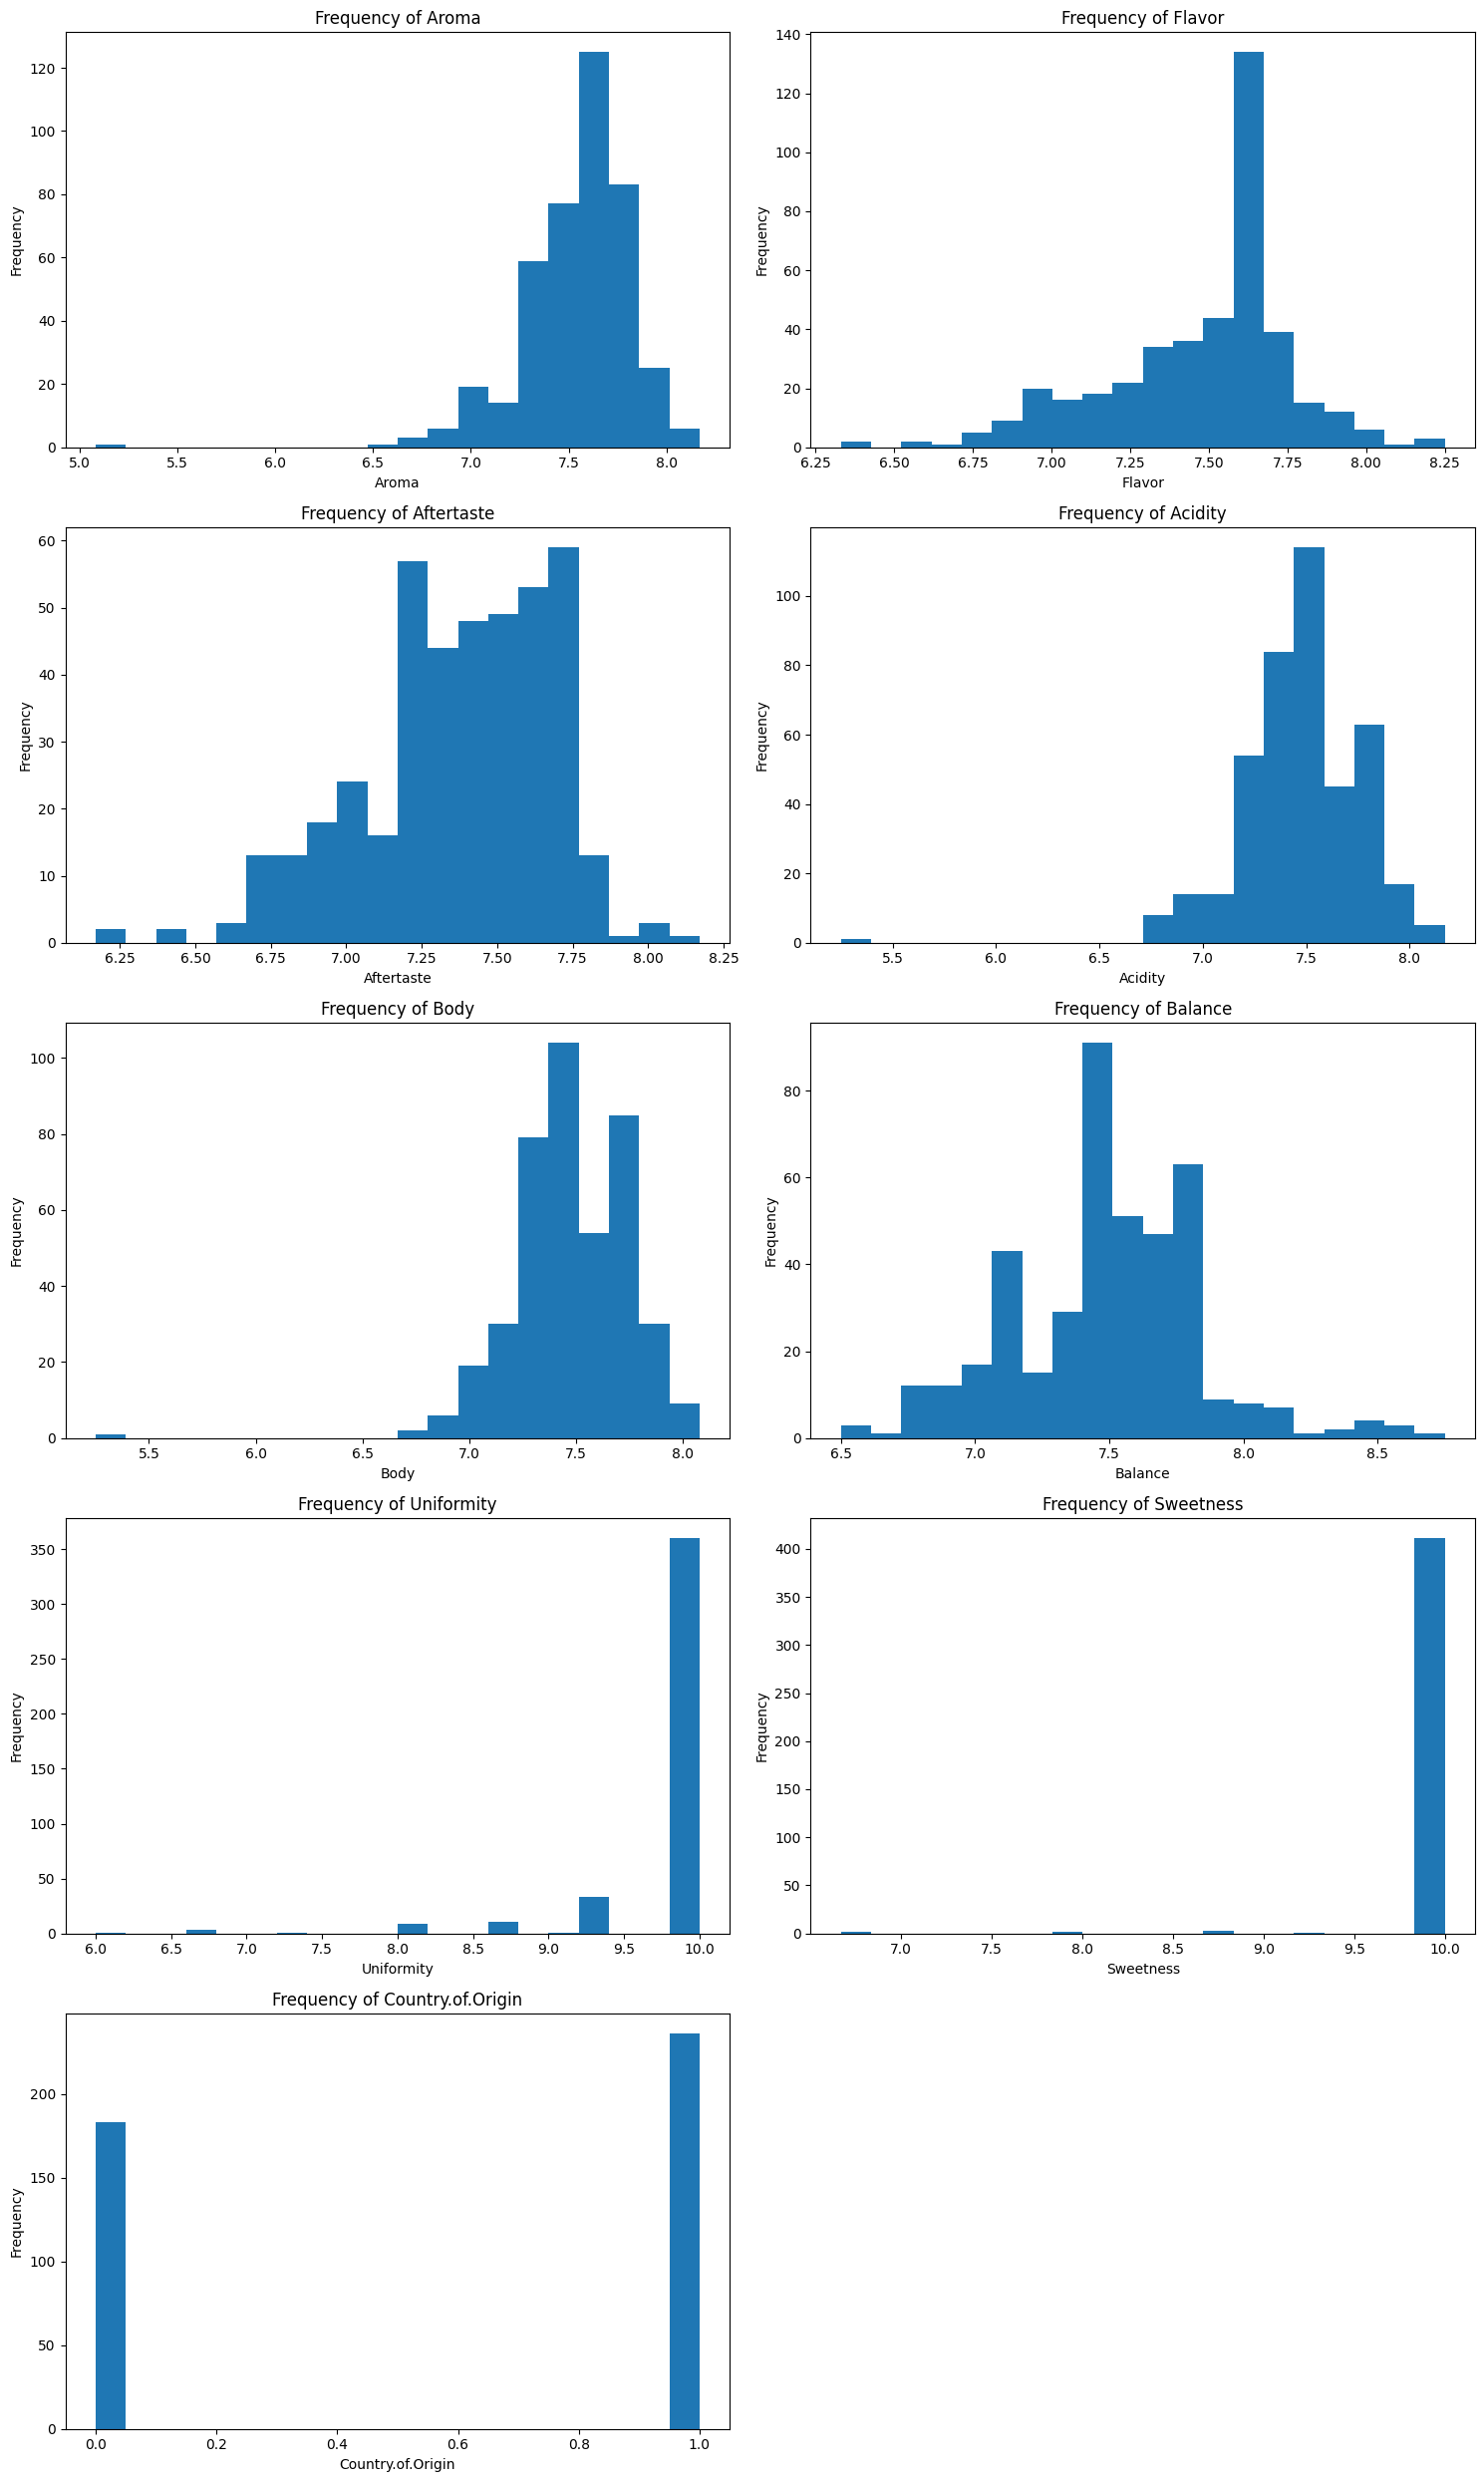

In [3]:
features = coffee.columns

# Create a grid of subplots
n = len(features)
ncols = 2  # Number of columns in the grid
nrows = (n + ncols - 1) // ncols  # Number of rows required

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D

for i, feature in enumerate(features):
    axes[i].hist(coffee[feature], bins=20)
    axes[i].set_title(f'Frequency of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


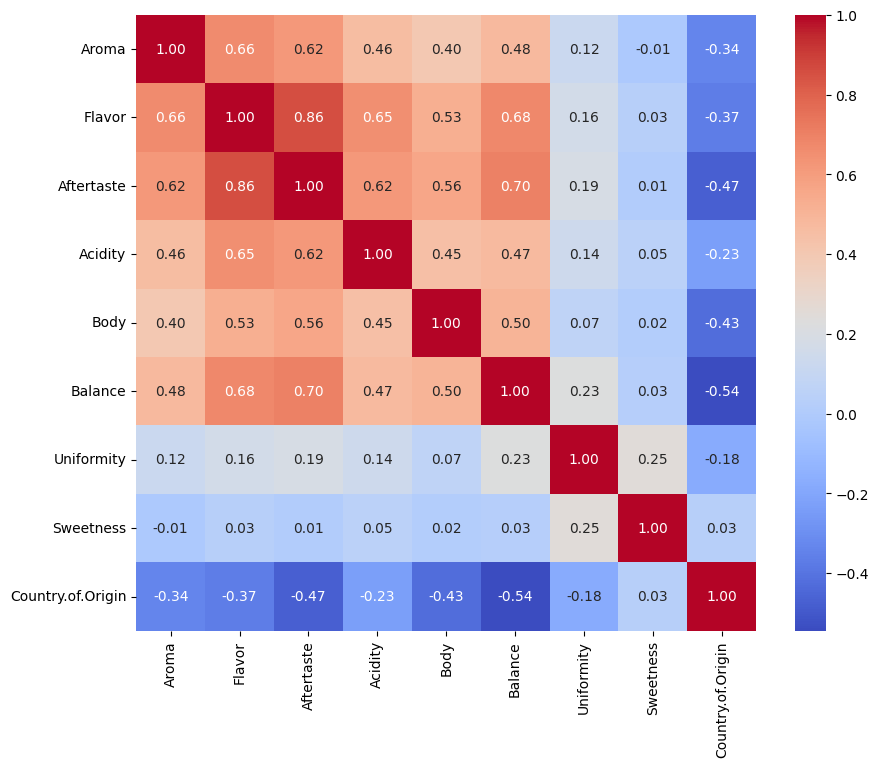

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'coffee' is your DataFrame
corr_matrix = coffee.corr()

# Create the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Save the figure as a PNG
# plt.savefig("correlation_matrix.png")

# Display the plot
plt.show()


### Wine dataset

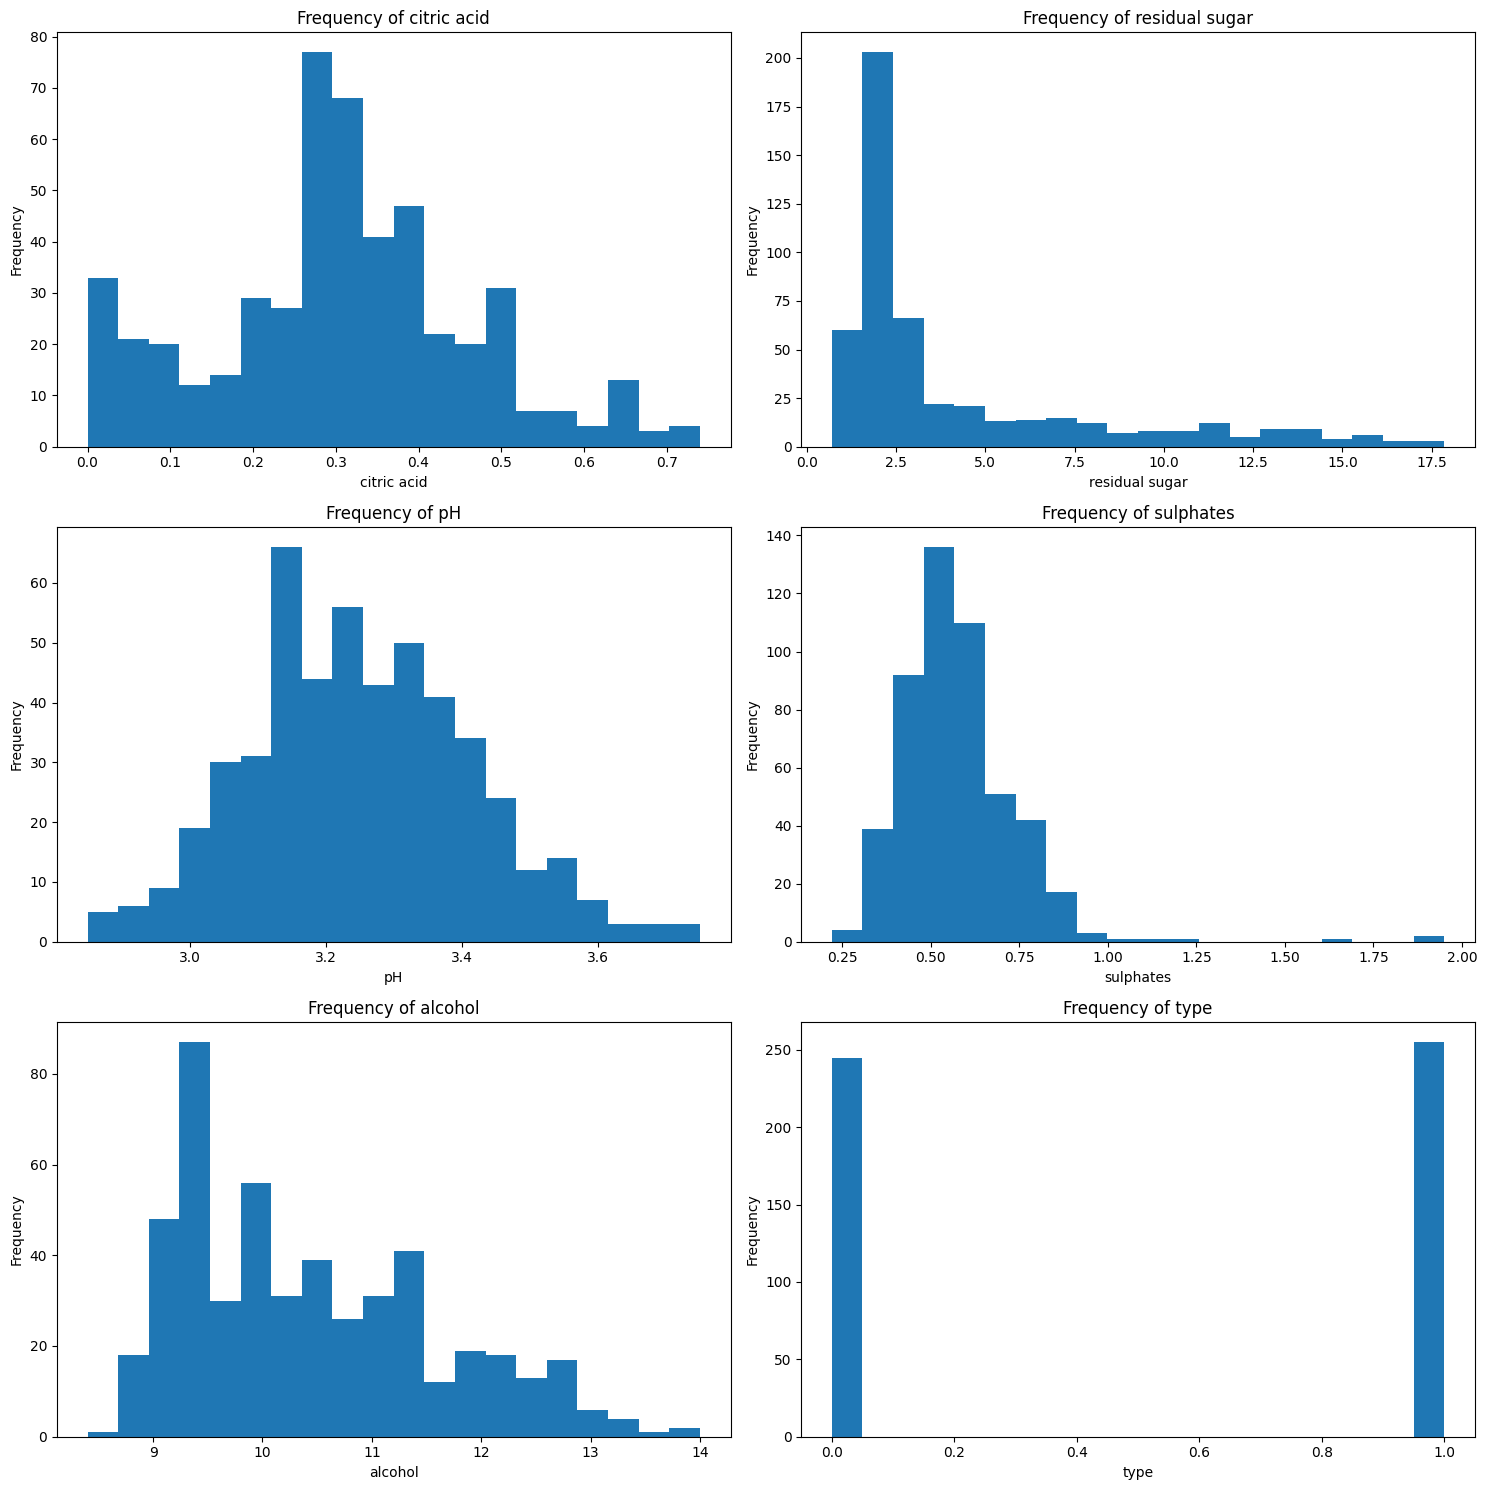

In [5]:
features = wine.columns

# Create a grid of subplots
n = len(features)
ncols = 2  # Number of columns in the grid
nrows = (n + ncols - 1) // ncols  # Number of rows required

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D

for i, feature in enumerate(features):
    axes[i].hist(wine[feature], bins=20)
    axes[i].set_title(f'Frequency of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Targets are balanced

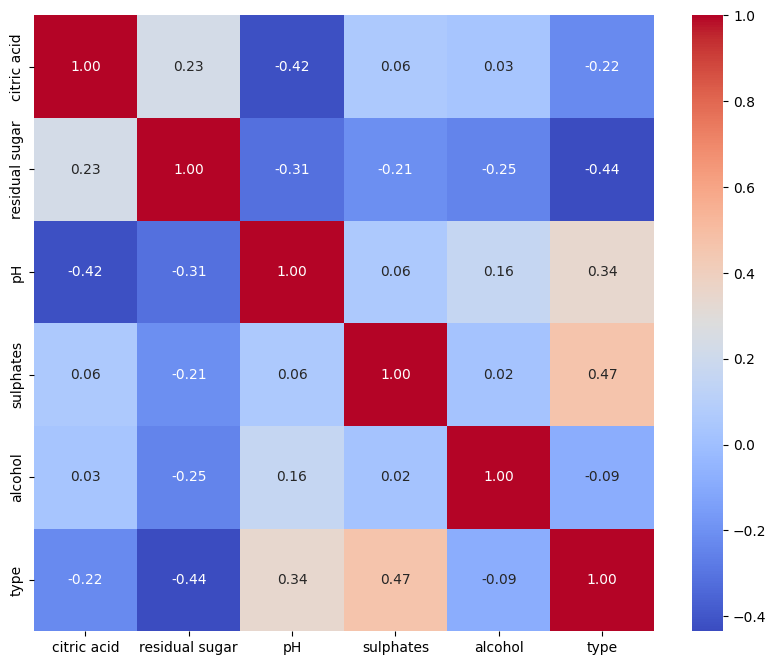

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'coffee' is your DataFrame
corr_matrix = wine.corr()

# Create the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Save the figure as a PNG
plt.savefig("correlation_matrix.png")

# Display the plot
plt.show()


### Data preprocessing

We did not have to perform any data preprocessing as the data was already clean and ready to be used.

## Implementations

### Decision tree classifier:

We used the decision tree classifier to predict the type / country of origin of coffee and wine. The user is able to decide between a range of hyperparameters to tune the model.

| Hyperparameter | Description | Default value | Possible values |
| --- | --- | --- | --- |
| `max_depth` | The maximum depth of the tree | `None` | `None` or `int` |
| `criterion` | The function to measure the quality of a split | `gini` | `gini`, `entropy` |
| `max_features` | The maximum amount of features | `None` | `log2`, `sqrt` and `None` |
| `random_state` | The seed for all random functions | `0` | `int` |

#### How it works:

The decision tree classifier works by splitting the data into subsets. The subsets are split based on the feature that results in the best split. This process is repeated recursively until the data is completely split into subsets. The decision tree classifier uses the Gini impurity or entropy to measure the quality of a split. `max_depth` is used to determine when to stop splitting the data, such that  $\forall n \in \text{nodes} (n_{depth} <= \text{max\char`_depth} )$. `max_features` is the maximum amount of levels in the tree. The decision tree classifier uses the maximum amount of features to determine the maximum amount of features to consider when looking for the best split. `random_state` is used as a seed for random processes to ensure reproducibility.

**Infomation gain**

We calculate IG for each feature and choose the feature with the highest IG to split the data on. The IG is calculated as follows:

$$IG(x, y) = H(y) - H(y|x)$$

Where:

- $IG(x, y)$ is the information gain

- $H(y)$ is the entropy/gini index of the target variable

- $H(y|x)$ is the conditional entropy/gini index of the target variable given the feature





### Random Forest classifier:

We built the RFC on top of the decision tree classifier. The way it works is that it uses bagging. This means that it trains multiple decision trees on different subsets of the data to reduce overfitting and increase diversity among the trees. The RFC uses the majority vote to make predictions. The following hyperparameters can be tuned:

| Hyperparameter | Description | Default value | Possible values |
| --- | --- | --- | --- |
| `n_estimators` | The number of trees to train | `100` | `int` |
| `max_depth` | The maximum depth of the tree | `None` | `None` or `int` |
| `criterion` | The function to measure the quality of a split | `gini` | `gini`, `entropy` |
| `max_features` | The maximum amount of features | `sqrt` | `log2`, `sqrt` and `None` |
| `random_state` | The seed for all random functions | `0` | `int` |



## Model selection and evaluation

We tuned the aforementioned hyperparameters using grid search. We use accuracy as the metric to evaluate the model. The reason why is because it is a simple metric that is easy to understand and works quite well, although it is prone to overfitting. However, this was mitigated by using cross-validation (from `sklearn GridSearchCV`) as well as using a random forest classifier (majority vote).

We need to figure out which model is the best for each dataset. The following steps will be taken:

- Split the data into a training and test set

- Tune hyperparameters for both models using grid search

- Evaluate the models using accuracy

- Choose the best model for each dataset


### Hyperparameter tuning for the decision tree classifier

| Hyperparameter | Potential values |
| --- | --- |
| `max_depth` | `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, None]` |
| `criterion` | `["entropy", "gini"]` |
| `max_features` | `["log2", "sqrt", None]` |

### Hyperparameter tuning for the random forest classifier

| Hyperparameter | Potential values |
| --- | --- |
| `n_estimators` | `[5, 6, 7, 8, 9, 10, 25, 30, 50, 75, 100]` |
| `max_depth` | `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, None]` |
| `criterion` | `["entropy", "gini"]` |
| `max_features` | `["log2", "sqrt", None]` |

## Wine dataset


We tune the hyperparameters by using Grid Search Cross Validation. We use the following hyperparameters: 



### Our decision tree classifier: 

| Hyperparameter | Value |
| --- | --- |
| `max_depth` | `None` |
| `criterion` | `entropy` |
| `max_features` | `None` |

### Our random forest classifier: 

| Hyperparameter | Value |
| --- | --- |
| `n_estimators` | `100` |
| `max_depth` | `5` |
| `criterion` | `entropy` |
| `max_features` | `sqrt` |

### SKLearn decision tree classifier: 

| Hyperparameter | Value |
| --- | --- |
| `max_depth` | `7` |
| `criterion` | `entropy` |
| `max_features` | `None` |

### SKLearn random forest classifier: 

| Hyperparameter | Value |
| --- | --- |
| `n_estimators` | `75` |
| `max_depth` | `9` |
| `criterion` | `entropy` |
| `max_features` | `log2` |

Our decision tree classifier best model score: Training = 1, validation = 0.84

Our random forest classifier best model score: Training = 0.9971, validation = 0.87333

SKLearn decision tree classifier best model score: Training = 0.9485, validation = 0.7866

SKLearn random forest classifier best model score: Training = 0.9971, validation = 0.87333





## Coffee dataset



We tune the hyperparameters by using Grid Search Cross Validation. We use the following hyperparameters: 

### Our decision tree classifier: 

| Hyperparameter | Value |
| --- | --- |
| `max_depth` | `None` |
| `criterion` | `entropy` |
| `max_features` | `None` |

### Our random forest classifier: 

| Hyperparameter | Value |
| --- | --- |
| `n_estimators` | `100` |
| `max_depth` | `5` |
| `criterion` | `entropy` |
| `max_features` | `sqrt` |

### SKLearn decision tree classifier: 

| Hyperparameter | Value |
| --- | --- |
| `max_depth` | `3` |
| `criterion` | `entropy` |
| `max_features` | `None` |

### SKLearn random forest classifier: 

| Hyperparameter | Value |
| --- | --- |
| `n_estimators` | `25` |
| `max_depth` | `4` |
| `criterion` | `entropy` |
| `max_features` | `None` |

Our decision tree classifier best model score: Training = 1, validation = 0.73

Our random forest classifier best model score: Training = 0.86, validation = 0.8015

SKLearn decision tree classifier best model score: Training = 0.8464, validation = 0.7936

SKLearn random forest classifier best model score: Training = 0.8737, validation = 0.8095





## Conclusion

Comparing the results, we can see that the random forest classifier is the best model for both datasets. The random forest classifier has a higher accuracy than the decision tree classifier. The random forest classifier is able to reduce overfitting by training multiple decision trees on different subsets of the data. We also observe that the SKLearn implementation of the RFC has a similar accuracy to our implementation. This shows that our implementation is more or less correct because SKLearn's implementation is well-tested and optimized. This applies to both datasets. 

We have successfully created a decision tree classifier and a random forest classifier to predict the type / country of origin of coffee and wine. We have tuned the hyperparameters for both models using grid search. We have evaluated the models using accuracy. We have chosen the best model for each dataset.

For next time it could be wise to clean the datasets to remove any statistical outliers in order to improve the accuracy of the models. We could also try to use other models to see if we can get better results. Having a wider spread of hyperparameters could also be beneficial. We chose not to do that because it would significantly worsen computational cost.